# Loading Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Exploration

In [4]:
os.listdir("/kaggle/input/heart-disease-dataset")

['heart.csv']

In [6]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Variable Explanation
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. Target 0=No Diseas 1=Disease

## Data Wrangling 
### Perliminary Observation
- There are no missing values in the dataset
- Datatypes can be adjusted for better preformance.
- Categorical data such as sex, chest pain, fasting blood sugar, exercise induced angina and thal can be changed to categorical for clarity and sample analysis
- Categorical data isnt balanced.

In [10]:
df['sex'] = df['sex'].astype("category")
df['cp'] = df['cp'].astype("category")
df['thal'] = df['thal'].astype("category")

df['fbs'] = df['fbs'].astype("bool")
df['exang'] = df['exang'].astype("bool")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1025 non-null   int64   
 1   sex       1025 non-null   category
 2   cp        1025 non-null   category
 3   trestbps  1025 non-null   int64   
 4   chol      1025 non-null   int64   
 5   fbs       1025 non-null   bool    
 6   restecg   1025 non-null   int64   
 7   thalach   1025 non-null   int64   
 8   exang     1025 non-null   bool    
 9   oldpeak   1025 non-null   float64 
 10  slope     1025 non-null   int64   
 11  ca        1025 non-null   int64   
 12  thal      1025 non-null   category
 13  target    1025 non-null   int64   
dtypes: bool(2), category(3), float64(1), int64(8)
memory usage: 77.7 KB


In [12]:
df.replace({"sex":{0:'Female', 1:"Male"}},inplace=True)

/tmp/ipykernel_33/5644524.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.replace({"sex":{0:'Female', 1:"Male"}},inplace=True)


In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,0,125,212,False,1,168,False,1.0,2,2,3,0
1,53,Male,0,140,203,True,0,155,True,3.1,0,0,3,0
2,70,Male,0,145,174,False,1,125,True,2.6,0,0,3,0
3,61,Male,0,148,203,False,1,161,False,0.0,2,1,3,0
4,62,Female,0,138,294,True,1,106,False,1.9,1,3,2,0


## Data Exploration

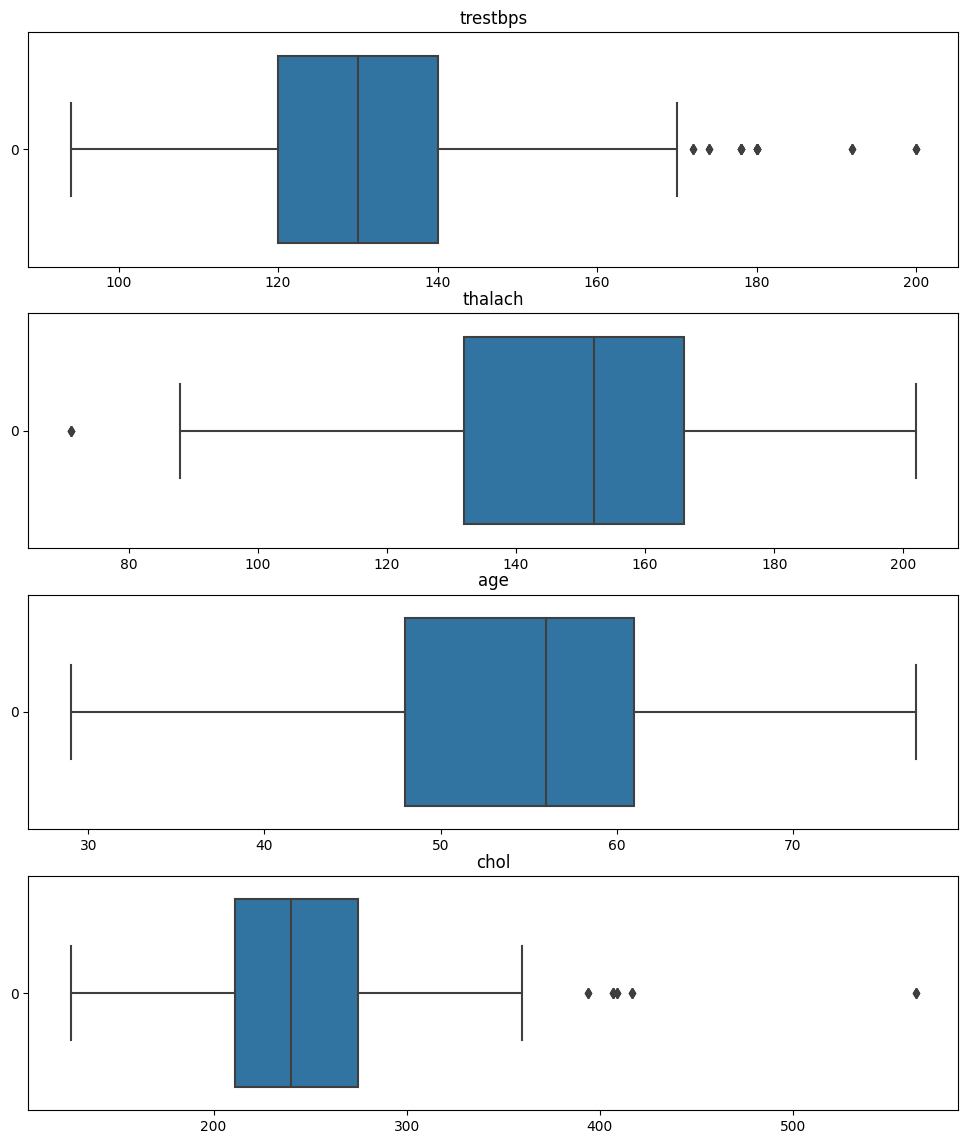

In [83]:
fig, axes = plt.subplots(4,1,figsize=(12,14))
tickers = ["trestbps","thalach","age","chol"]

for n, ticker in enumerate(tickers):
    sns.boxplot(df[tickers[n]],orient="h",ax=axes[n])
    axes[n].set_title(tickers[n])

# Questions
1. How is sex correlated with resting blood pressure?
2. How is age correlated with resting blood pressure?
3. How is sex correlated with Cholestrol?
4. How is age correlated with Cholestrol?
5. How is sex correlated with Blood Sugar?
6. How is age correlated with Blood Sugar?

## Sample Analysis

In [ ]:
df1 = df.loc[:,["age","sex","trestbps","chol","fbs"]]

In [ ]:
df1.rename(columns={"trestbps":'resting_BP',
            "chol":"cholestrol_lvl",
            'fbs':"blood_sugar_120"},inplace=True)

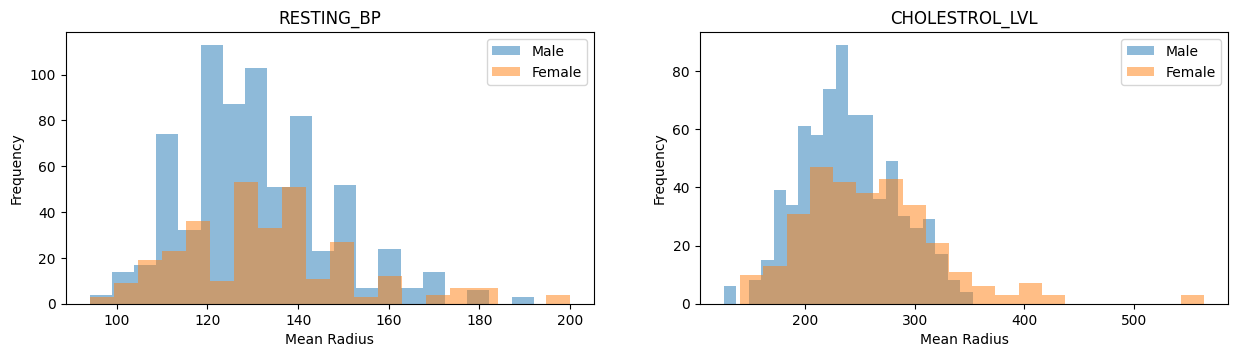

In [ ]:
plt.figure(figsize=(15, 12))

ticker = ["resting_BP","cholestrol_lvl"]
for n, ticker in enumerate(ticker):
  ax = plt.subplot(3,2,n+1)

  ax.hist(df1[df1['sex']=='Male'].loc[:,ticker], bins=20, alpha=0.5, label='Male')
  ax.hist(df1[df1['sex']=='Female'].loc[:,ticker], bins=20, alpha=0.5, label='Female')
  ax.set_xlabel('Mean Radius')
  ax.set_ylabel('Frequency')

  ax.set_title(ticker.upper())
  ax.legend()
  #plt.show()

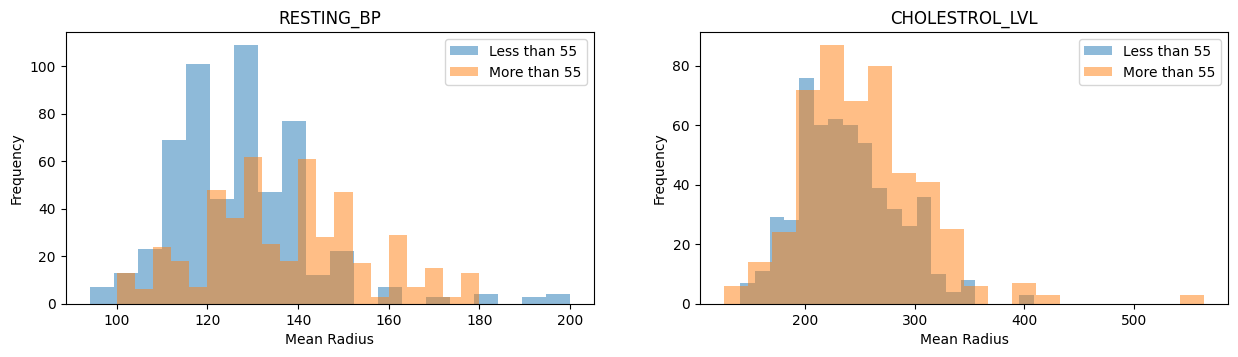

In [ ]:
plt.figure(figsize=(15, 12))

ticker = ["resting_BP","cholestrol_lvl"]
for n, ticker in enumerate(ticker):
  ax = plt.subplot(3,2,n+1)

  ax.hist(df1[df1['age']<=56].loc[:,ticker], bins=20, alpha=0.5, label='Less than 55')
  ax.hist(df1[df1['age']>56].loc[:,ticker], bins=20, alpha=0.5, label='More than 55')
  ax.set_xlabel('Mean Radius')
  ax.set_ylabel('Frequency')

  ax.set_title(ticker.upper())
  ax.legend()

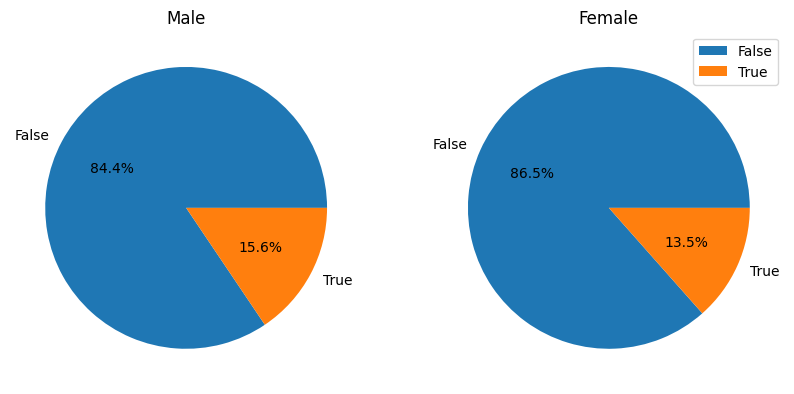

In [ ]:
mlabels = df1[df['sex']=='Male'].loc[:,"blood_sugar_120"].value_counts().index
msizes = df1[df['sex']=='Male'].loc[:,"blood_sugar_120"].value_counts().values
flabels = df1[df['sex']=='Female'].loc[:,"blood_sugar_120"].value_counts().index
fsizes = df1[df['sex']=='Female'].loc[:,"blood_sugar_120"].value_counts().values

fig, ax = plt.subplots(1,2, figsize=(10,10)) #4 rows and 2 columns each
ax[0].pie(msizes,labels=mlabels,autopct='%1.1f%%')
ax[0].set_title("Male")

ax[1].pie(fsizes,labels=flabels,autopct='%1.1f%%')
ax[1].set_title("Female")


plt.legend()
plt.show()

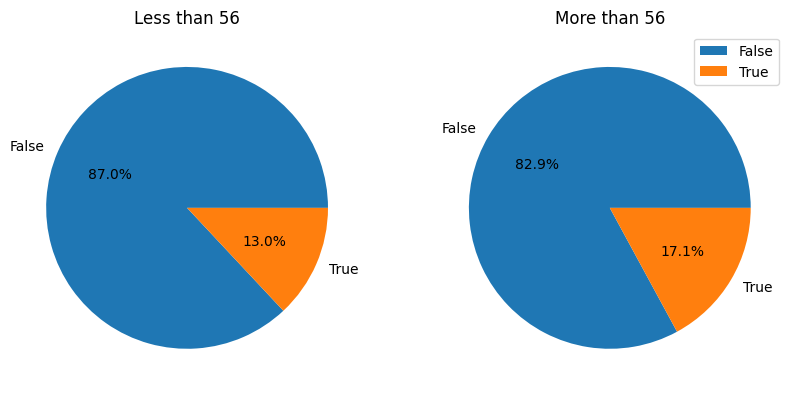

In [ ]:
mlabels = df1[df['age']<=56].loc[:,"blood_sugar_120"].value_counts().index
msizes = df1[df['age']<=56].loc[:,"blood_sugar_120"].value_counts().values
flabels = df1[df['age']>56].loc[:,"blood_sugar_120"].value_counts().index
fsizes = df1[df['age']>56].loc[:,"blood_sugar_120"].value_counts().values

fig, ax = plt.subplots(1,2, figsize=(10,10)) #4 rows and 2 columns each
ax[0].pie(msizes,labels=mlabels,autopct='%1.1f%%')
ax[0].set_title("Less than 56")

ax[1].pie(fsizes,labels=flabels,autopct='%1.1f%%')
ax[1].set_title("More than 56")


plt.legend()
plt.show()

## Correlation Analysis

In [ ]:
sex = pd.get_dummies(df['sex'],prefix="sex")
df2 = pd.concat([df1, sex], axis=1)
df2.head()

,age,sex,resting_BP,cholestrol_lvl,blood_sugar_120,sex_Female,sex_Male
0,52,Male,125,212,False,False,True
1,53,Male,140,203,True,False,True
2,70,Male,145,174,False,False,True
3,61,Male,148,203,False,False,True
4,62,Female,138,294,True,True,False


In [ ]:
df2['age_less_than_56'] = df2['age']<=56
df2['age_more_than_56'] = df2['age']>56

In [ ]:
df2.head()

,age,sex,resting_BP,cholestrol_lvl,blood_sugar_120,sex_Female,sex_Male,age_less_than_56,age_more_than_56
0,52,Male,125,212,False,False,True,True,False
1,53,Male,140,203,True,False,True,True,False
2,70,Male,145,174,False,False,True,False,True
3,61,Male,148,203,False,False,True,False,True
4,62,Female,138,294,True,True,False,False,True


In [ ]:
df2.drop(['age','sex'],axis=1,inplace=True)

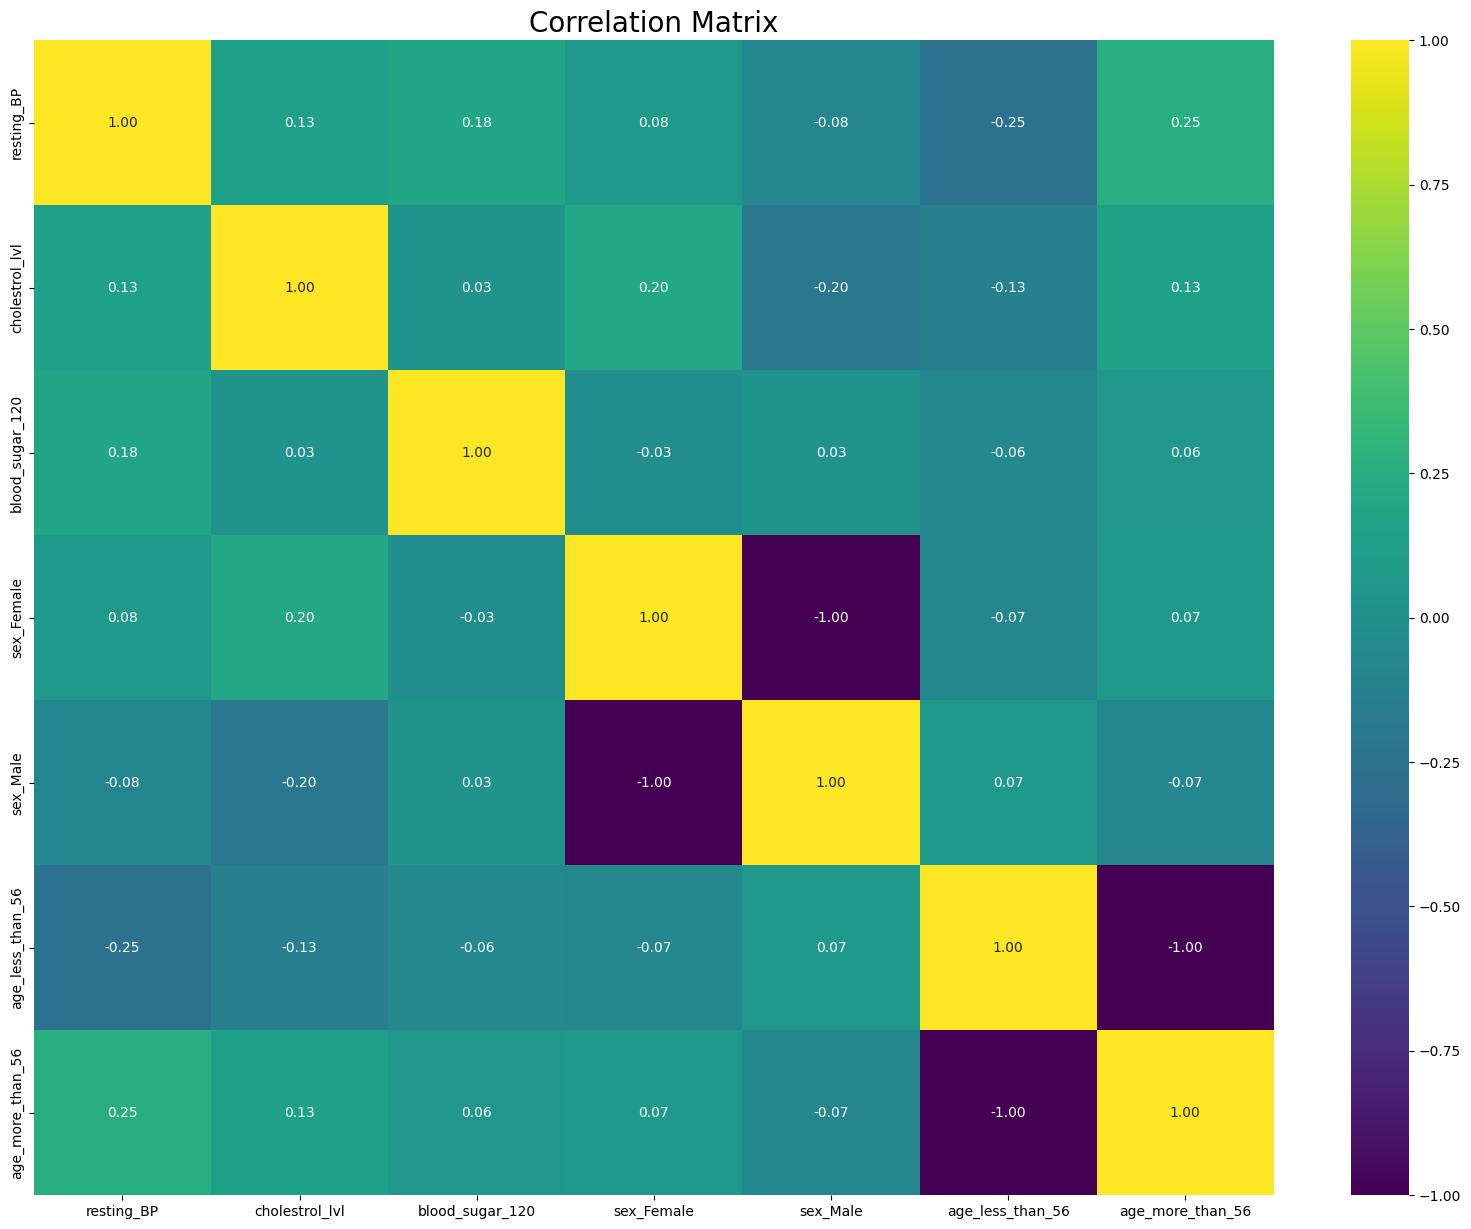

In [ ]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df2.corr(), annot=True, fmt = '.2f', cmap='viridis')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()